# Mathod Halving method

In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
def func (x):
    # return 4 - np.exp(x) - 2*(x**2)
    # return X**2
    return x**3

def dfunc (x):
    # return -np.exp(x) - 4*x
#     return 2*x 
    return 3*(x**2)

In [130]:

def halving(f, start, end, eps=1e-5):
    a = start
    b = end
    while b - a > eps:
        c = (a + b) / 2
        if f(b)*f(c) < 0:
            a = c
        else: 
            b = c
        # print("a: {}, b: {}, c: {}".format(a, b, c))    
    return c

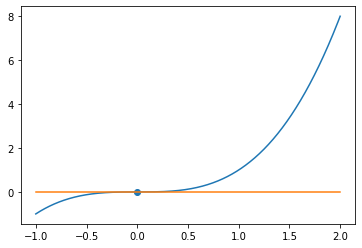

In [131]:
start = -1
end   = 2

xx = np.linspace(start, end, 1000)
yy = func(xx)
plt.plot(xx, yy)
plt.plot(xx, np.zeros_like(xx))
point = halving(func, start, end)
plt.scatter(point, func(point))

# Root multiplicity estimate

In [140]:
def root_est(xnp1, xn, xnm1):
    # if np.abs(xn - xnm1) < eps:
    #     return 1
    Q = (xnp1 - xn)/(xn - xnm1)
    # print(Q)
    p = 1. / (1. - Q)
    return p

# Method Hewton(secants method)

In [141]:
def hewton_2(f, df, x0, eps=1e-10):
    xk = x0
    xk1 = xk - f(xk)/df(xk)
    
    while np.abs(xk1 - xk) > eps:
        xk = xk1
        xk1 = xk - f(xk)/df(xk)
        # print("xk1: {}, xk: {}".format(xk1, xk))
    
    xk2 = xk1 - f(xk1)/df(xk1)
    print("root estimate: {}".format(root_est(xk2, xk1, xk)))    
    return xk1    

root estimate: 3.0000000000000018


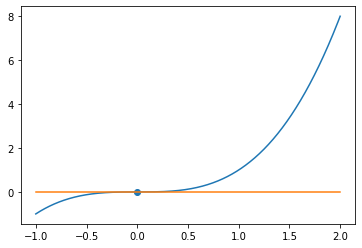

In [142]:
start = -1
end   = 2
x0    = 10

xx = np.linspace(start, end, 1000)
yy = func(xx)

point = hewton_2(func, dfunc, x0)

plt.plot(xx, yy)
plt.plot(xx, np.zeros_like(xx))
plt.scatter(point, func(point))

# Newton's method (secant method)

In [143]:
def hewton_1(f, dfx0, x0, eps=1e-5):
    xk = x0
    xk1 = xk - f(xk)/dfx0
    
    while np.abs(xk1 - xk) > eps:
        xk = xk1
        xk1 = xk - f(xk)/dfx0
        # print("xk1: {}, xk: {}".format(xk1, xk))
        
    # xk2 = xk1 - f(xk1)/dfx0
    # print("root estimate: {}".format(root_est(xk2, xk1, xk)))        
    return xk1 

root estimate: 1036.3907068257988


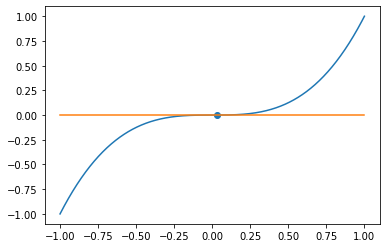

In [144]:
start = -1
end   = 1
x0    = 1
dfx0  = dfunc(x0)

xx = np.linspace(start, end, 1000)
yy = func(xx)

plt.plot(xx, yy)
plt.plot(xx, np.zeros_like(xx))

point = hewton_1(func, dfx0, x0)
plt.scatter(point, func(point))

# Newton's method

In [149]:
def hewton(f, x0, x1, eps=1e-10):
    xk  = x0
    xk1 = x1
    
    while np.abs(xk1 - xk) > eps:
        df = (f(xk1) - f(xk)) / (xk1 - xk)
        xk = xk1
        xk1 = xk - f(xk)/df
        # print("xk1: {}, xk: {}".format(xk1, xk))
    
    # df = (f(xk1) - f(xk)) / (xk1 - xk)
    # xk2 = xk1 - f(xk1)/df
    print("root estimate: {}".format(root_est(xk2, xk1, xk)))    
    return xk1 

root estimate: 4.079595623491442


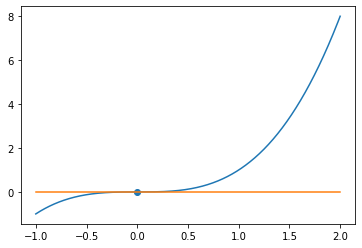

In [150]:
start = -1
end   = 2
x0    = 1
x1    = 2
dfx0  = dfunc(x0)

xx = np.linspace(start, end, 1000)
yy = func(xx)

plt.plot(xx, yy)
plt.plot(xx, np.zeros_like(xx))

point = hewton(func, x0, x1)
plt.scatter(point, func(point))

# N mod Newton

In [240]:
def f_1(A, B, C, X):
    return A@X@X + B@X + C

def f_2(D, Y):
    return Y@Y - D

In [241]:
def newton_1(A, B, C, max_iter_num, eps):
    errors =[]
    X_k = A
    for i in range(max_iter_num):
        delta_X = np.linalg.solve(2*A@X_k + B, -f_1(A, B, C, X_k))
        errors.append(np.linalg.norm(delta_X))
        X_k += delta_X

        if(np.linalg.norm(delta_X) < eps):
            break
    return X_k, errors

In [242]:
n = 4
delta = 0.5
E = np.ones((n,n)) 
W = (1 -np.sqrt(delta))/(n-1)*(E - np.eye(n))
A = W
B = W - np.eye(n)

C = W + np.sqrt(delta)*np.eye(n)

Ошибка ответа 0.000000


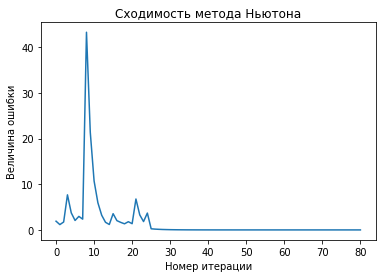

In [243]:
X,errors = newton_1(A, B, C, 5000, 1e-7)
plt.plot(errors)
plt.xlabel('Номер итерации')
plt.ylabel('Величина ошибки')
plt.title('Сходимость метода Ньютона')
print('Ошибка ответа %f' % np.linalg.norm(f_1(A, B, C, X)))

We see that at the initial iterations, due to the choice of a not quite suitable initial approximation, there is an error fluctuation, but on the whole the method converges with a high accuracy

In [244]:
def newton_2(D, max_iter_num, eps):
    errors =[]
    X_k = D
    for i in range(max_iter_num):
        delta_X = np.linalg.solve(2*X_k, -f_2(D, X_k))
        errors.append(np.linalg.norm(f_2(D, X_k)))
        X_k += delta_X

        if(np.linalg.norm(delta_X) < eps):
            break
    return X_k, errors

Ошибка ответа 0.000000


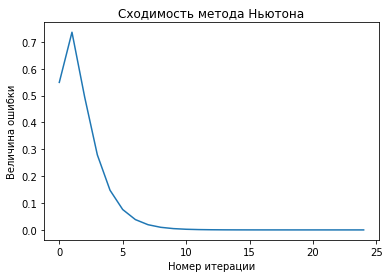

In [245]:
D = np.eye(10)
for i in range(10):
    for j in range(10):
        D[i][j] = (1 + j)/1000.
for i in range(10):
    D[i][i] = i/20.

X, errors = newton_2(D, 5000, 1e-7)
plt.plot(errors)
plt.xlabel('Номер итерации')
plt.ylabel('Величина ошибки')
plt.title('Сходимость метода Ньютона')
print('Ошибка ответа %f' % np.linalg.norm(f_2(D, X)))

For a given equation and matrix, Newton's method converges with great accuracy rather quickly

# Solving the equation using the secant method

In [246]:
def f(x, A):
    I = np.eye(A.shape[0])
    return A@x-I
    

In [247]:
def cut_method(max_iter_num, eps, n):
    errors = []
    A = np.random.normal(size=(n,n))
    A_1 = (A.T)/(np.linalg.norm(A))**2
    A_0 = 0.5*A_1
    x_k = A_1
    x_l = A_0
    for i in range(max_iter_num):
        x_n = x_k - ((x_k - x_l).dot(np.linalg.inv(f(x_k, A) - f(x_l, A))).dot(f(x_k, A)))
        error = np.linalg.norm(x_n - x_k)
        errors.append(error)
        if(np.linalg.norm(x_n - x_k) < eps):
            break
        x_l = x_k.copy()
        x_k = x_n.copy()
    return x_n, errors, A

[[ 1.  0. -0.  0.  0.  0.  0.  0. -0.  0.]
 [ 0.  1.  0.  0. -0. -0. -0.  0. -0.  0.]
 [ 0.  0.  1.  0. -0.  0.  0. -0. -0. -0.]
 [ 0.  0.  0.  1.  0. -0.  0. -0. -0. -0.]
 [ 0. -0. -0.  0.  1. -0.  0. -0. -0.  0.]
 [-0. -0.  0.  0.  0.  1.  0. -0. -0.  0.]
 [ 0.  0.  0.  0. -0. -0.  1.  0. -0.  0.]
 [-0.  0. -0. -0.  0.  0.  0.  1. -0. -0.]
 [-0.  0.  0.  0.  0. -0. -0.  0.  1.  0.]
 [ 0. -0.  0. -0.  0.  0. -0. -0.  0.  1.]]


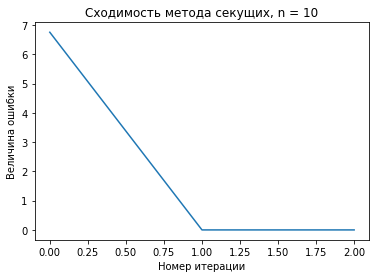

In [248]:
#matrix nxn, n = 10
X, errors, A = cut_method(10000, 1e-13, 10)
plt.plot(errors)
plt.xlabel('Номер итерации')
plt.ylabel('Величина ошибки')
plt.title('Сходимость метода секущих, n = 10')
print(np.round(A@X,6))